In [25]:
import matplotlib.pyplot as plt
import numpy as np
from astropy import constants as const
from astropy import units as u
from scipy.optimize import curve_fit

In [2]:
#Define relevant constants
c = const.c.cgs
e = const.e.esu
m = const.m_e.cgs
h = const.h.cgs
sigmaT = const.sigma_T.cgs
r0 = e**2 / (m*c**2)

## Question 2

### Part A

In [3]:
def cross_section(eps,theta):
    eps = eps.cgs
    eps1 = eps / ( 1 + (eps / (m*c**2))*(1-np.cos(theta)))
    return (.5 * r0**2)*(eps1**2 / eps**2)*(eps/eps1 + eps1 / eps - (np.sin(theta))**2)

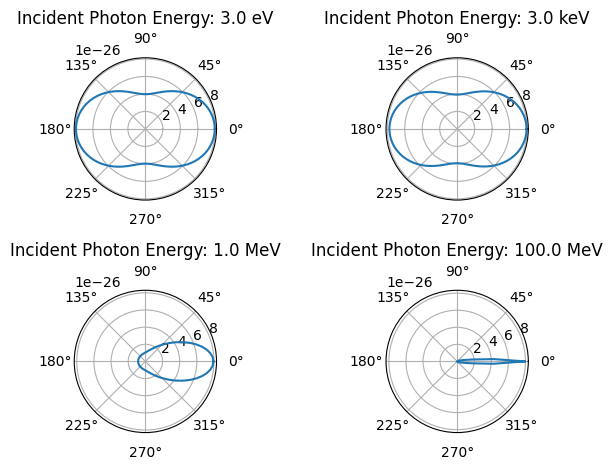

In [4]:
energies = [3 * u.eV, 3 * u.keV, 1 * u.MeV, 100 * u.MeV]
thetas = np.linspace(0, 2*np.pi, 100)
plt.figure()

for i, energy in enumerate(energies):
    cross_section_array = []
    for theta in thetas:
        cross_section_array.append(cross_section(energy,theta).value)
    plt.subplot(2, 2, i + 1, projection='polar')
    plt.plot(thetas,cross_section_array)
    plt.title(f'Incident Photon Energy: {energy}')
plt.tight_layout()

### Part B

In [5]:
def total_sigma(x):
    sigma = 0.75 * sigmaT * ( (1+x)/(x**3) * ( (2*x*(1+x)) / (1+2*x) - np.log(1+2*x) ) +  1 / (2*x) * np.log(1+2*x) - (1+3*x) / ((1+2*x)**2) )
    return sigma

In [6]:
x_list = np.logspace(-3, 1, 1000)
sigma = []
for x in x_list:
    sigma.append(total_sigma(x).value)

(2e-25, 8e-25)

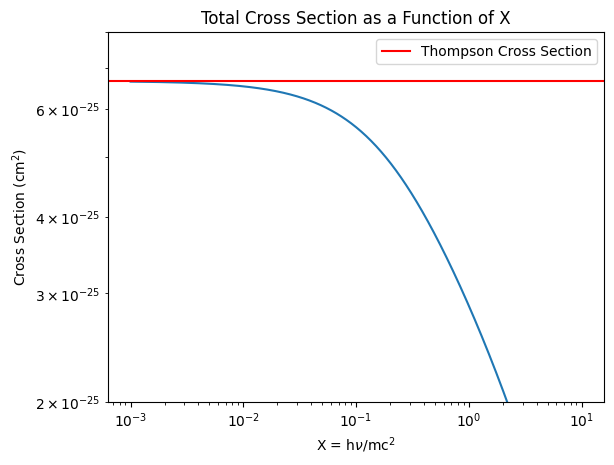

In [7]:
plt.plot(x_list,sigma)
plt.yscale('log')
plt.xscale('log')
plt.axhline(y=sigmaT.value, label= 'Thompson Cross Section', color='red')
plt.legend()
plt.title('Total Cross Section as a Function of X')
plt.xlabel(r'X = h$\nu$/mc$^2$')
plt.ylabel(r'Cross Section (cm$^{2}$)')
plt.ylim(2e-25,8e-25)

As X increases, the total cross section falls off.

## Question 2

### Part E

[ 3.52051636e+08 -4.98034088e+01]


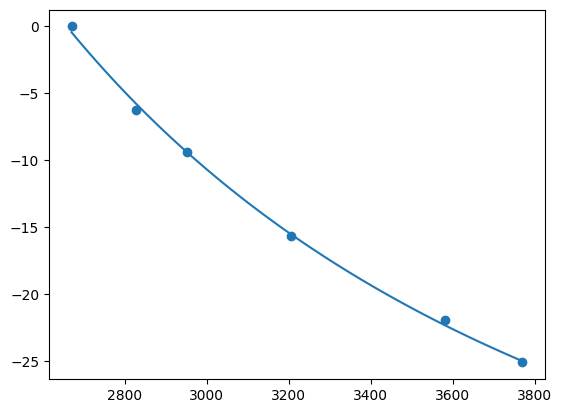

In [50]:
#Define array of points for best-fit
x = [425,450,470,510,570,600]
w = [2*np.pi*freq for freq in x] #Convert MHz to omega values
y = [0,-2*np.pi,-3*np.pi,-5*np.pi,-7*np.pi,-8*np.pi] 

#Define function we're fitting to data
def function(w,A2,const):
    return (A2 / (w**2)) + const

params, covariance = curve_fit(function, w, y)

A2_fit = params[0]
const_fit = params[1]

w_fit = np.linspace(min(w),max(w),100)
y_fit = function(w_fit, A2_fit, const_fit)

plt.scatter(w,y)
plt.plot(w_fit,y_fit)

print(params)